# Проект: Исследование стартапов

### Цели и задачи проекта

__Цель__ - Подготовить датасет и проверить данные на адекватность, ответить на вопросы о предобработке и о значении данных для бизнеса.

__Задачи - ответить на следующие вопросы заказчика:__
- по каким столбцам можно объединять данные из разных таблиц;
- можно ли доверять данным о сотрудниках стартапов и их образовании;
- что означают покупки за 0 или за 1 доллар;
- какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику.

###  Описание данных
В анализе использованы следующие датасеты:
- company_and_rounds.csv
- acquisition.csv
- people.csv
- education.csv
- degrees.csv

<div style="max-height:300px; overflow:auto; border:1px solid #ddd; padding:10px;">
    Таблица <b>acquisition</b><br>
Содержит информацию о покупках одними компаниями других компаний:<br>
- id — идентификатор покупки.<br>
- acquiring_company_id — идентификатор покупающей компании.<br>
- acquired_company_id — идентификатор покупаемой компании.<br>
- term_code — варианты расчёта.<br>
- price_amount — сумма сделки.<br>
- acquired_at — дата сделки.<br><br>
    Таблица <b>company_and_rounds</b><br>
Содержит информацию о компаниях и раундах финансирования:<br>
- company ID — идентификатор компании.<br>
- name — название компании.<br>
- category code — категория области деятельности компании.<br>
- status — статус компании.<br>
- founded at — дата инвестирования.<br>
- closed at — дата закрытия компании.<br>
- domain — официальный сайт компании.<br>
- network username — ник компании в сети.<br>
- country code — код страны компании.<br>
- investment rounds — число инвестиционных раундов.<br>
- funding rounds — число раундов финансирования.<br>
- funding total — сумма финансирования.<br>
- milestones — вехи финансирования.<br>
- funding round id — идентификатор этапа финансирования.<br>
- company id — идентификатор компании.<br>
- funded at — дата финансирования.<br>
- funding round type — тип финансирования.<br>
- raised amount — сумма финансирования.<br>
- pre money valuation — предварительная денежная оценка.<br>
- participants — число участников.<br>
- is first round — является ли раунд первым.<br>
- is last round — является раунд последним.<br><br>
    Таблица <b>education</b><br>
Содержит информацию об образовании сотрудника:<br>
- id — идентификатор записи об образовании.<br>
- person_id — идентификатор работника.<br>
- instituition — название учебного заведения.<br>
- graduated_at — дата получения образования.<br><br>
    Таблица <b>people</b><br>
Содержит информацию о сотрудниках:<br>
- id — идентификатор сотрудника.<br>
- first_name — имя сотрудника.<br>
- last_name — фамилия сотрудника.<br>
- company_id — идентификатор компании.<br>
- network_username — ник в социальных сетях.<br><br>
    Таблица <b>degrees</b><br>
Содержит информацию о типе образования сотрудника:<br>
- id — идентификатор записи.<br>
- object_id — идентификатор сотрудника.<br>
- degree_type — тип образования.<br>
- subject — специальность.<br>
</div>

### Содержимое проекта
- 1   Шаг 1. Знакомство с данными: загрузка и первичная предобработка
- 1.1 Вывод общей информации, исправление названия столбцов
- 1.2 Смена типов и анализ пропусков
- 2   Шаг 2. Предобработка данных, предварительное исследование
- 2.1 Раунды финансирования по годам
- 2.2 Люди и их образование
- 2.3 Объединять или не объединять — вот в чём вопрос
- 2.4 Проблемный датасет и причина возникновения пропусков
- 3   Шаг 3. Исследовательский анализ объединённых таблиц
- 3.1 Объединение данных
- 3.2 Анализ выбросов
- 3.3 Куплены забесплатно?
- 3.4 Цены стартапов по категориям
- 3.5 Сколько раундов продержится стартап перед покупкой
- 4   Шаг 4. Итоговый вывод и рекомендации


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка
### 1.1. Вывод общей информации, исправление названия столбцов

In [ ]:
!pip install phik

In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix
import warnings
warnings.filterwarnings("ignore")  

In [3]:
# Отображение всех столбцов без "..."
pd.set_option('display.max_columns', None)

In [4]:
# Загружаем необходимые файлы для работы
df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
df_company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
df_education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

# Загружаем дополнительные файлы для работы
df_fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
df_investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

In [5]:
# Создадим словарь с основными файлами
dictionary_df={
         'df_acquisition':df_acquisition,
         'df_company_and_rounds':df_company_and_rounds,
         'df_people':df_people,
         'df_education':df_education,
         'df_degrees':df_degrees
}

In [6]:
# Проверим названия столбцов в основных файлах
for name, df in dictionary_df.items():
    print(f'Столбцы файла \033[1m{name}\033[0m: {list(df.columns)}')

Столбцы файла df_acquisition: ['id', 'acquiring_company_id', 'acquired_company_id', 'term_code', 'price_amount', 'acquired_at']
Столбцы файла df_company_and_rounds: ['company  ID', 'name', 'category  code', 'status', 'founded  at', 'closed  at', 'domain', 'network  username', 'country  code', 'investment  rounds', 'funding  rounds', 'funding  total', 'milestones', 'funding  round  id', 'company  id', 'funded  at', 'funding  round  type', 'raised  amount', 'pre  money  valuation', 'participants', 'is  first  round', 'is  last  round']
Столбцы файла df_people: ['id', 'first_name', 'last_name', 'company_id', 'network_username']
Столбцы файла df_education: ['id', 'person_id', 'instituition', 'graduated_at']
Столбцы файла df_degrees: ['id', 'object_id', 'degree_type', 'subject']


In [7]:
# Приведем названия столбцов в файле company_and_round к snake_case
df_company_and_rounds.columns=df_company_and_rounds.columns.str.lower().str.replace(' ', '_')
# Проверим изменения
print(f'\033[1mСтолбцы файла company_and_rounds:\033[0m {list(df_company_and_rounds.columns)}')
#В некоторых случаях из-за двойных пробелов получилось двойное подчеркивание, исправим:
df_company_and_rounds.columns=df_company_and_rounds.columns.str.lower().str.replace('__', '_')
# Проверим изменения
print(f'\033[1mСтолбцы файла company_and_rounds после второго изменения:\033[0m {list(df_company_and_rounds.columns)}')

Столбцы файла company_and_rounds: ['company__id', 'name', 'category__code', 'status', 'founded__at', 'closed__at', 'domain', 'network__username', 'country__code', 'investment__rounds', 'funding__rounds', 'funding__total', 'milestones', 'funding__round__id', 'company__id', 'funded__at', 'funding__round__type', 'raised__amount', 'pre__money__valuation', 'participants', 'is__first__round', 'is__last__round']
Столбцы файла company_and_rounds после второго изменения: ['company_id', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'funding_round_id', 'company_id', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']


In [8]:
# Выведем прервые строчки всех датафреймов
for name,df in dictionary_df.items():
    print('\n\n', name)
    display(df.head())
    print('-'*120)



 df_acquisition


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


------------------------------------------------------------------------------------------------------------------------


 df_company_and_rounds


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------------------------------------------------------------------------------


 df_people


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


------------------------------------------------------------------------------------------------------------------------


 df_education


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


------------------------------------------------------------------------------------------------------------------------


 df_degrees


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


------------------------------------------------------------------------------------------------------------------------


In [9]:
# Выведеме информацию о всех датафреймах
for name, df in dictionary_df.items():
    print(f'\n\nДатафрейм:\033[1m{name}\033[0m')
    print(df.info())
    print('-'*120)



Датафрейм:df_acquisition
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB
None
------------------------------------------------------------------------------------------------------------------------


Датафрейм:df_company_and_rounds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null 

### 1.2. Смена типов и анализ пропусков

In [10]:
# Приведем столбцы с датаой к нужному формату datetime
for df in dictionary_df.values():
    for column in df.columns:
        if column in ['acquired_at','founded_at', 'closed_at', 'funded_at', 'graduated_at']:
            df[column]=pd.to_datetime(df[column])

In [11]:
# Проверим результат преобразований: выведеме информацию о всех датафреймов
for name, df in dictionary_df.items():
    print(f'\n\nДатафрейм:\033[1m{name}\033[0m')
    print(df.info())
    print('-'*120)



Датафрейм:df_acquisition
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB
None
------------------------------------------------------------------------------------------------------------------------


Датафрейм:df_company_and_rounds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---

In [12]:
# Выведем долю пропусков по всем датафреймам
for name,df in dictionary_df.items():
    print(f'\n\nДатафрейм:\033[1m{name}\033[0m')
    print(df.isna().sum().sort_values(ascending=False).round(2))
    print('-'*120)



Датафрейм:df_acquisition
term_code               7576
acquired_at               29
acquiring_company_id       0
id                         0
acquired_company_id        0
price_amount               0
dtype: int64
------------------------------------------------------------------------------------------------------------------------


Датафрейм:df_company_and_rounds
closed_at              214325
funded_at              165094
is_first_round         164846
participants           164846
funding_round_id       164846
raised_amount          164846
is_last_round          164846
funding_round_type     164846
company_id             164846
pre_money_valuation    164846
network_username       122240
country_code           109167
founded_at             107818
category_code           73888
domain                  70615
name                      303
status                    302
company_id                302
milestones                302
funding_total             302
funding_rounds            302
i

In [13]:
# Выведем долю пропусков по всем датафреймам в долевом значении
for name,df in dictionary_df.items():
    print(f'\n\nДатафрейм:\033[1m{name}\033[0m')
    print(df.isna().mean().sort_values(ascending=False).round(2))
    print('-'*120)



Датафрейм:df_acquisition
term_code               0.81
acquired_at             0.00
acquiring_company_id    0.00
id                      0.00
acquired_company_id     0.00
price_amount            0.00
dtype: float64
------------------------------------------------------------------------------------------------------------------------


Датафрейм:df_company_and_rounds
closed_at              0.98
funded_at              0.76
is_first_round         0.76
participants           0.76
funding_round_id       0.76
raised_amount          0.76
is_last_round          0.76
funding_round_type     0.76
company_id             0.76
pre_money_valuation    0.76
network_username       0.56
country_code           0.50
founded_at             0.50
category_code          0.34
domain                 0.32
name                   0.00
status                 0.00
company_id             0.00
milestones             0.00
funding_total          0.00
funding_rounds         0.00
investment_rounds      0.00
dtype: float6

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  
    Сводная информация об объеме данных:

1) Датафрейм df_acquisition содержит 9407 строк и 6 столбцов. Пропуски содержаться в двух столбцах term_code 81%(7576 строк) и acquired_at 0%(29 строк).

2) Датафрейм df_company_and_rounds содержит 217774 строки и 22 столбца. Пропуски содержаться во всех столбцах, больше всего пропусков в closed_at  98%(214325).

3) Датафрейм df_education содержит 226709 строки и 5 столбца. Пропуски содержаться в двух столбцах company_id 85%(192094) и network_username 83%(187842), пропуски содердат еще два столбца, но не более 5 строк. 

4) Датафрейм df_company_and_rounds содержит 109610 строки и 4 столбца. Значительные пропуски содержаться только в одном graduated_at 47%(51556).

5) Датафрейм df_degrees содержит 109610 строки и 4 столбца. Пропуски содержаться  в одном subject 26% (28312) и 10%(11218).

В данных встречается достаточно много пропусков, некоторые столбцы не будут в дальнейшем участвовать в анализе, но для решения поставденных задач информации будет достаточно, точнее можно будет сказать в ходе проекта.
    </div>

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

In [14]:
#выделим год из даты
df_company_and_rounds['funded_year']=df_company_and_rounds['funded_at'].dt.year
# построим сводную таблицу
pivot_table_raised=df_company_and_rounds.pivot_table(index='funded_year',
                                                     values=['funding_rounds','raised_amount'],
                                                     aggfunc=({'funding_rounds':'sum','raised_amount':'median'})).reset_index()
# Приведем данные в более читабельный вид
pivot_table_raised[['funded_year','funding_rounds']]=pivot_table_raised[['funded_year','funding_rounds']].astype('int64')
pivot_table_raised['raised_amount']=pivot_table_raised['raised_amount'].round(2)
pivot_table_raised=pivot_table_raised.rename(columns={'raised_amount':'raised_amount_round'})
pivot_table_raised

,funded_year,funding_rounds,raised_amount_round
0,1960,16,0.0
1,1973,1,0.0
2,1974,2,0.0
3,1984,3,41000.0
4,1985,1,0.0
5,1987,2,1250000.0
6,1989,1,15000.0
7,1990,1,1000000.0
8,1992,2,2000000.0
9,1993,2,62500.0


In [15]:
#отфильтруем информацию по годам (для тех лет, для которых есть информация о более чем 50 раундах финансирования.)
pivot_table_raised=pivot_table_raised[pivot_table_raised['funding_rounds']>50]
pivot_table_raised['rank']=pivot_table_raised['raised_amount_round'].rank(method='dense', ascending=False)
pivot_table_raised

,funded_year,funding_rounds,raised_amount_round,rank
14,1998,72,100000.0,11.0
15,1999,268,2000000.0,7.0
16,2000,403,4200000.0,3.0
17,2001,302,3000000.0,6.0
18,2002,385,4200000.0,3.0
19,2003,569,3000000.0,6.0
20,2004,1057,5000000.0,2.0
21,2005,4157,5500000.0,1.0
22,2006,6295,5000000.0,2.0
23,2007,8494,3973320.0,4.0


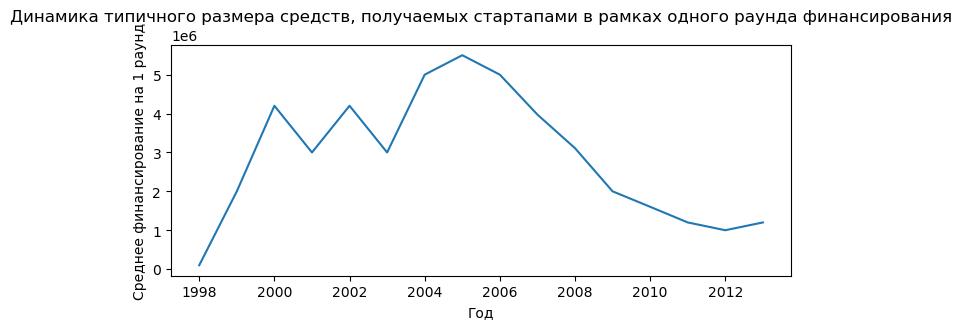

In [16]:
# Построим график 'Динамику типичного размера средств, получаемых стартапами в рамках одного раунда финансирования'
pivot_table_raised.plot(kind='line',
                        x='funded_year',
                        y='raised_amount_round',
                        legend=False,
                        figsize=(8,3)
                       )
plt.title('Динамика типичного размера средств, получаемых стартапами в рамках одного раунда финансирования')
plt.xlabel('Год')
plt.ylabel('Среднее финансирование на 1 раунд')
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  С 1960 до 1998 года информация была менеее чем о 50 раундах финансирования. Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году. В 2013 году количество раундов было меньше чем в 2012, но при этом типичный размер собранных в рамках одного раунда средств был выше, т.е. за меньшее количество раундов было привлечено больше средств. Тенденция наблюдается следующая, после пика в 2005 году размер средств, собранных в рамках одного раунда начал снижаться до 2012 года, и только в 2013 году тренд начал меняться в большую сторону. Падение финансирования на стартап произошло потому что финансироваться стали  мелкие стартапы, и они потянули среднюю вниз, т.е. инвестироваться стали даже в самые маленькие стартапы. </div>


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний, путем разделения всех компаний на несколько групп по по количеству сотрудников.

In [17]:
# присоединяем таблицу файла education.csv к people.csv
df_people_education=df_people.merge(df_education, left_on='id', right_on='person_id', how='left', suffixes=('', '_edu'))
df_people_education.head()

,id,first_name,last_name,company_id,network_username,id_edu,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [18]:
# Сгруппируем данные по количеству сотрудников в разрезе компании
company_people=df_people_education[df_people_education['company_id'].notna()].groupby('company_id')['id'].count().reset_index()
#отсортируем таблицу по убыванию количества сотрудников в компании
company_people.sort_values(by='id', ascending=False).head()

,company_id,id
48,59.0,376
25,29.0,221
777,1242.0,192
20605,231067.0,111
1761,4175.0,89


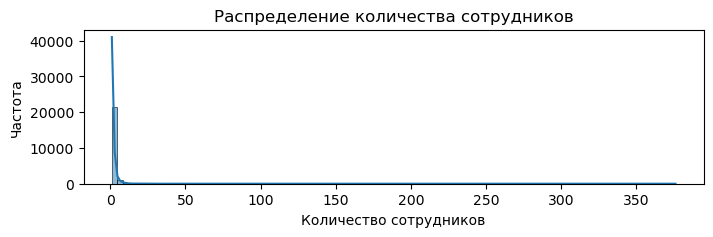

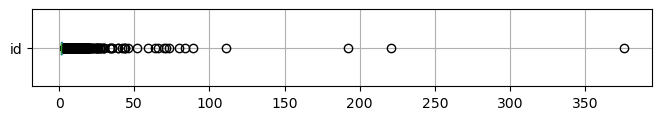

In [19]:
# Построим гистограмму распределение по количеству сотрудников
plt.figure(figsize=(8,2))
sns.histplot(data=company_people, x='id', bins=100, kde=True)
plt.xlabel('Количество сотрудников')
plt.ylabel('Частота')
plt.title('Распределение количества сотрудников')
plt.show()

# Строим диаграмму размаха методом boxplot()
boxplot=company_people.boxplot(column='id', vert=False, figsize=(8,1))

In [20]:
# Расчитаем квантили для дальнейшего разбиения на группы
quantiles = company_people['id'].quantile([0, 0.25, 0.5, 0.75, 0.9, 0.99, 1])
quantiles

0.00      1.00
0.25      1.00
0.50      1.00
0.75      2.00
0.90      3.00
0.99     10.79
1.00    376.00
Name: id, dtype: float64

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  
    Гистограмма распределения, диаграмма размаха и квантели показали, что количество сотрудников в компаниях с наличием сотрудников находится в промежутке от 1 до 376, при чем наибольшее количество компаний имеет одного сотрудника, а 99 квантиль представлен всего 10 сотрудниками. <br> 
    Поэтому было принято решение поделить компании на следующие группы:<br> 
1-1 сотрудник<br> 
2-3 - от 2 до 3 сотрудников<br> 
4-10 - от 4 до 10 сотрудников<br> 
11-50 - от 11 до 50 сотрудников<br> 
более 50 - от 50 до 376 сотрудников<br> 
</div>

In [21]:
# Разделим компании на группы    
company_people['company_size']=pd.cut(company_people['id'], bins=[0, 1, 3, 10, 50, 380], labels=['1', '2-3 ', '4-10', '11-50', 'более 50 ' ])
display(company_people.sort_values(by='id', ascending=False).head())

,company_id,id,company_size
48,59.0,376,более 50
25,29.0,221,более 50
777,1242.0,192,более 50
20605,231067.0,111,более 50
1761,4175.0,89,более 50


In [22]:
# Посмотрим количество компаний и сотрудников в каждой группе
group_company=company_people.groupby('company_size')['id'].agg(['count','sum'])
group_company

,count,sum
company_size,,
1,14150,14150
2-3,6592,15041
4-10,1950,10444
11-50,216,3546
более 50,14,1608


In [23]:
# Присоединим критерий размера компаний к нашим основным данным о сотрудниках и их образовании 
df_people_education=df_people_education.merge(company_people[['company_id', 'company_size']], on='company_id', how='left')
df_people_education.head()

,id,first_name,last_name,company_id,network_username,id_edu,person_id,instituition,graduated_at,company_size
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,более 50
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,11-50
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,2-3
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,2-3
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [24]:
#Рассчитаем долю пропусков в информации об образовании сотрудников в разрезе размера компании
share_info_edu=df_people_education.groupby('company_size')[['id','id_edu']].count()
share_info_edu['share_null']=(share_info_edu['id']-share_info_edu['id_edu'])/share_info_edu['id']
share_info_edu

,id,id_edu,share_null
company_size,,,
1,14150,5769,0.592297
2-3,15041,11628,0.226913
4-10,10444,7363,0.295002
11-50,3546,2564,0.276932
более 50,1608,1314,0.182836


<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  
    Количество компаний и количество сотрудников в каждой группе оказалось неравным (чем меньше сотрудников в компании, тем больше компаний в группе), но так как заказчик хочет понять, зависит ли полнота сведений о сотрудниках от размера компаний нужно учитывать и большие компании в разных группах.<br> 
    
Больше всего пропусков об образовании в компаниях из 1 человека 59% в группах от 2 до 50 сотрудников наблюдается близкая доля пропускоа от 23% до 30%, наименьшая доля пропусков 18% в компаниях с количеством сотрудников более 50%. В какой то степени можно сказать, что чем меньше компания по количеству сотрудников, тем больше пропусков в информации об образовании сотрудников в этих компаниях.
</div>

In [25]:
# переименуем столбец id в company_size2, который содержит количество сотрудников в компании
company_people = company_people.rename(columns={company_people.columns[1]: 'company_size2'})
# Добавим в нашу таблицу столбец company_size2
df_people_education1=df_people_education.merge(company_people[['company_id', 'company_size2']], on='company_id', how='left')

#Создадим новый столбец с булевым значением (есть ли информация об образованиении у сотрудника) 
def edu_boll(x):
    return False if pd.isna(x) else True

df_people_education1['edu_boll']=df_people_education1['id_edu'].apply(edu_boll)
df_people_education1

,id,first_name,last_name,company_id,network_username,id_edu,person_id,instituition,graduated_at,company_size,company_size2,edu_boll
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,более 50,84.0,True
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,11-50,14.0,False
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,2-3,3.0,False
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,2-3,2.0,False
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,False
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,1,1.0,True
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,1,1.0,True
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,NaN,NaN,False


In [26]:
# Построим матрицу корреляции связи наличия информации об образовании с количеством сотрудников  в компании
df_people_education2=df_people_education1[['company_size2', 'edu_boll']]
correlation_matrix = df_people_education2.phik_matrix(interval_cols=[])

# Построим матрицу корреляции связи наличия информации об образовании с группой, характеризующей размер компании
df_people_education2=df_people_education1[['company_size', 'edu_boll']]
correlation_matrix2 = df_people_education2.phik_matrix(interval_cols=[])

print(f'\n\nДатафрейм:\033[1mКорреляция между наличием информации об образовании и количеством сотрудников работающих в компании\033[0m')
display(correlation_matrix)
print('-'*120)

print(f'\n\nДатафрейм:\033[1mКорреляция между наличием информации об образовании и группой, характеризующей размер компании\033[0m')
display(correlation_matrix2)
print('-'*120)




Датафрейм:Корреляция между наличием информации об образовании и количеством сотрудников работающих в компании


,company_size2,edu_boll
company_size2,1.000000,0.406281
edu_boll,0.406281,1.000000


------------------------------------------------------------------------------------------------------------------------


Датафрейм:Корреляция между наличием информации об образовании и группой, характеризующей размер компании


,company_size,edu_boll
company_size,1.000000,0.273045
edu_boll,0.273045,1.000000


------------------------------------------------------------------------------------------------------------------------


<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  Посмотрели связь между наличием информации об образовании и количеством сотрудников работающих в компании (не разделяя на группы). Коэффициент корреляции 0.41 говорит о наличии умеренной положительной связи, для компаний с большим количеством сотрудников наличие информации об образовании встречаетя чаще, пропусков больше в компаниях с мальеньким количеством сотрудников.<br> 
Также проверили связь наличия образования с группой, характеризующей размер компании, которую мы присвоили ранее. Коэффициент корреляции 0.27 также указывает на наличие умеренной положительной связи, но связь слабее, чем в данных с указанием явного количества человек в компании.</div>

### 2.3. Объединять или не объединять — вот в чём вопрос

Отвечаем на вопрос заказчика: подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах, необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто, а также оценить, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [27]:
# Добавим в словарь датафреймов дополнительный датафрейм df_fund
dictionary_df.update({'df_fund': df_fund})

In [28]:
# Выведем прервые строчки датафреймов, в которых есть столбец network_username
for i, (name, df) in enumerate(dictionary_df.items()):
    if i in (1,2,5):
        print('\n\n', name)
        display(df.head())
        print('-'*120)



 df_company_and_rounds


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------------------------------------------------------------------------------


 df_people


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


------------------------------------------------------------------------------------------------------------------------


 df_fund


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


------------------------------------------------------------------------------------------------------------------------


In [29]:
# Выведеме информацию о всех датафреймах, в которых есть столбец network_username
for i, (name, df) in enumerate(dictionary_df.items()):
    if i in (1, 2, 5): 
        print(f'\n\nДатафрейм:\033[1m{name}\033[0m')
        print(df.info())
        print('-'*120)



Датафрейм:df_company_and_rounds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  

In [30]:
# Составим множетво из столбца network_username для каждого из трех датафреймов
network_company = set(df_company_and_rounds['network_username'])
network_people = set(df_people['network_username'])
network_fund = set(df_fund['network_username']) 

# Посмотрим на количество пересечений в двух датафреймах по network_username
network_company_people=network_company & network_people
network_company_people_count = len(network_company_people)
print(f'Количество пересечений network_username в данных df_company_and_rounds и df_people \033[1m{network_company_people_count}\033[0m')

network_company_fund = network_company & network_fund
network_company_fund_count = len(network_company_fund)
print(f'Количество пересечений network_username в данных df_company_and_rounds и df_fund network_company_fund_count \033[1m{network_company_fund_count}\033[0m')

network_people_fund = network_people & network_fund
network_people_fund_count = len(network_people_fund)
print(f'Количество пересечений network_username в данных df_fund и df_people network_people_fund_count \033[1m{network_people_fund_count}\033[0m')

Количество пересечений network_username в данных df_company_and_rounds и df_people 2200
Количество пересечений network_username в данных df_company_and_rounds и df_fund network_company_fund_count 71
Количество пересечений network_username в данных df_fund и df_people network_people_fund_count 80


In [31]:
# ядро умрет
#dff=df_company_and_rounds.merge(df_people, how='inner', on='network_username', suffixes=('_company', '_peope'))
#dff=df_company_and_rounds.merge(df_fund, how='inner', on='network_username', suffixes=('_company', '_peope'))
#dff=df_people.merge(df_fund, how='inner', on='network_username', suffixes=('_company', '_peope'))

In [32]:
# Посмотрим на данные датафрейма df_company_and_rounds в которых network_username совпадает с таблицей df_people
filtered_df = df_company_and_rounds[
    df_company_and_rounds['network_username'].notna() &  
    (df_company_and_rounds['network_username'] != '') &  
    df_company_and_rounds['network_username'].isin(network_company_people)  
]
filtered_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
411,10221.0,Redphlag LLC,consulting,operating,2008-01-01,NaT,redphlag.com,gerardcorbett,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,10243.0,Future Delivery,web,operating,2007-07-07,NaT,viralogy.com,yukaichou,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,102700.0,PATMADE Patentanwalt Kuehnel,legal,operating,2005-01-01,NaT,patmade.de,paberata,DEU,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,103556.0,TriVium Systems,software,operating,1996-01-01,NaT,triviumsystems.biz,triviumsys,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,103681.0,BouliBrand Marketing,consulting,operating,2005-03-01,NaT,boulibrand.com,stroumboulis,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217438,33601.0,Network-Friends,other,operating,2008-12-01,NaT,network-friends.com,furukama,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217460,150413.0,Infuy,software,operating,2007-01-01,NaT,infuy.com,network,URY,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217461,155238.0,Sunfra,consulting,operating,NaT,NaT,sunfra.com,network,IND,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217462,183352.0,Mattress Source,NaN,operating,NaT,NaT,mattresssourcestl.com,network,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Посмотрим на данные датафрейма df_people в которых network_username совпадает с таблицей  df_company_and_rounds
filtered_df1 = df_people[
    df_people['network_username'].notna() &  
    (df_people['network_username'] != '') &  
    df_people['network_username'].isin(network_company_people)  
]
filtered_df1

,id,first_name,last_name,company_id,network_username
6,100006,Courtney,Homer,81558.0,jobsbostontech
8,100010,Michael,Dadashyan,NaN,fbroulette
114,100143,W3Origin,Services,81656.0,w3origin
136,100166,Robert,Rawson,62428.0,manageyourtime
268,100319,Abhishek,Balaria,81796.0,thezentity
...,...,...,...,...,...
226513,99763,Bill,Douglass,81382.0,billdouglass
226531,99789,Steve,Edwards,NaN,rhobi1
226539,99796,Steffany,Boldrini,NaN,ecobold
226589,9986,Sean,Hurley,70845.0,96robots


<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  
    Столбец network_usernam имеет разный смысл для разных таблиц для:<br>
<b>company_and_rounds</b> -  ник компании в сети<br>
<b>people</b> - ник в социальных сетях (логично предположить ник работника)<br>
<b>доп таблица fund </b>- ник фонда в сети.<br>
Если опираться на здравый смысл, то все network_username должные иметь разное значение и объединять по этой колонке нельзя. Но все же была рассмотрена возможность такого варианта.
</div>

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  
    Количество пересечений network_username в данных<br>
    df_company_and_rounds и df_people 2200 строк (при том, что в df_company_and_rounds заполнено всего 95534 строк по этому столбцу),<br>
    в df_company_and_rounds и df_fund network_company_fund_count 71 строка и 
    <br>df_fund и df_people network_people_fund_count 80 строк.  <br>
    При объединении датафреймов через столбец network_username ядро умирает, так как образуется огромное количество записей, кроме того нет никакого смысла в объединении. <br>
    Посмотрев на совпадения можно сказать, что для некоторых сотрудников в таблице people указана не почта сотрудников, а почта компании.</div>


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.


<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  
    Похоже, что датафрейм df_company_and_rounds ранее состоял из двух разных датафреймов, первый содержал информацию о компаниях и финансировании, а второй о раундах финансирования, на это указывает и то, что столбец company_id встречается 2 раза, во втором пропусков 76%, а впервом 0%, соответственно необходимо оставить первый 'company_id'.</div>

In [34]:
df_company_and_rounds.head(20)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Удалим второй столбец company_id, чтоб можно было работать далее с этим датафреймом
df_company_and_rounds=df_company_and_rounds.loc[:,~df_company_and_rounds.columns.duplicated()]
df_company_and_rounds.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#отсортируемданные по количеству раундов, чтоб убедиться в разбивке общей информации по отдельным раундам
df_company_and_rounds.sort_values(by=['funding_rounds', 'company_id'], ascending=False)[40:45]

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
140830,27486.0,Aviir,biotech,operating,2005-01-01,NaT,aviir.com,AviirLabs,USA,0.0,14.0,70930000.0,1.0,46205.0,2008-12-02,venture,7800000.0,0.0,3.0,0.0,0.0,2008.0
140831,27486.0,Aviir,biotech,operating,2005-01-01,NaT,aviir.com,AviirLabs,USA,0.0,14.0,70930000.0,1.0,46206.0,2009-08-05,venture,1000000.0,0.0,3.0,0.0,0.0,2009.0
140832,27486.0,Aviir,biotech,operating,2005-01-01,NaT,aviir.com,AviirLabs,USA,0.0,14.0,70930000.0,1.0,46208.0,2011-06-21,venture,3000000.0,0.0,3.0,0.0,0.0,2011.0
140833,27486.0,Aviir,biotech,operating,2005-01-01,NaT,aviir.com,AviirLabs,USA,0.0,14.0,70930000.0,1.0,46209.0,2013-02-12,series-b,10000000.0,0.0,4.0,0.0,0.0,2013.0
185267,56808.0,InstaMed,medical,operating,2004-01-01,NaT,instamed.com,InstaMed,USA,0.0,13.0,57876800.0,1.0,30122.0,2006-02-01,venture,3000000.0,0.0,2.0,0.0,0.0,2006.0


In [37]:
# создадим новый датафрейм df_company, чтоб работать с ним в дальнейшем
df_company=df_company_and_rounds[['company_id', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones','funded_year']]
df_company=df_company.drop_duplicates(subset='company_id', keep='first')
print(df_company.info())

<class 'pandas.core.frame.DataFrame'>
Index: 196554 entries, 0 to 217472
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196552 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
 13  funded_year        31487 non-null   float64      

In [38]:
# создадим новый датафрейм df_rounds с информацией о раунах
df_rounds=df_company_and_rounds[['company_id', 'funding_round_id', 'funded_at', 'funding_round_type', 'raised_amount','pre_money_valuation','participants','is_first_round','is_last_round' ]]
df_rounds.head()

,company_id,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,888.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,889.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,2312.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Поверим пропуски
df_rounds.isna().mean()

company_id             0.001387
funding_round_id       0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

In [40]:
# удалим строки с отсутствующими данными о раундах
df_rounds=df_rounds.dropna(subset=['funding_round_type'])
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52928 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52626 non-null  float64       
 1   funding_round_id     52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.0+ MB


<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  
    Разбили датафрейм df_company_and_rounds на 2 новых: <br>
    1) датафрем df_company, в котором содержится информация о компании и финансировании в целом. Датафрейм состоит из 196554 строк и 13 столбцов, ранее 217774 срок и 22 столбца. <br>
    2) датафрем df_rounds, в котором содержится информация о раундах финансирования. Датафрейм состоит из 52928 строк и 9 столбцов.<br>
</div>


## Шаг 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

In [41]:
# Создадим новый датафрейм df_company_filter (компании с финансированием или инвестициями) 
df_company_filter=df_company[(df_company['funding_rounds']>0) | (df_company['investment_rounds']>0) | (['status']=='acquired')]
df_company_filter.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2005.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,2008.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,2008.0
21,10015.0,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,5.0,68069200.0,0.0,2008.0
26,100155.0,MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0.0,3.0,10125300.0,1.0,2011.0


In [42]:
# выведем информацию о полученном датафрейме
df_company_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34031 entries, 0 to 217469
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         34031 non-null  float64       
 1   name               34031 non-null  object        
 2   category_code      31327 non-null  object        
 3   status             34031 non-null  object        
 4   founded_at         25129 non-null  datetime64[ns]
 5   closed_at          2117 non-null   datetime64[ns]
 6   domain             31240 non-null  object        
 7   network_username   19651 non-null  object        
 8   country_code       30586 non-null  object        
 9   investment_rounds  34031 non-null  float64       
 10  funding_rounds     34031 non-null  float64       
 11  funding_total      34031 non-null  float64       
 12  milestones         34031 non-null  float64       
 13  funded_year        31486 non-null  float64       
dtypes: datetim

In [43]:
# Посмотрим пропуски
df_company_filter.isna().mean().round(2).sort_values(ascending=False)

closed_at            0.94
network_username     0.42
founded_at           0.26
country_code         0.10
category_code        0.08
domain               0.08
funded_year          0.07
status               0.00
company_id           0.00
name                 0.00
investment_rounds    0.00
funding_rounds       0.00
funding_total        0.00
milestones           0.00
dtype: float64

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  Создали новый датафрейм df_company_filterе с компаниями, которые меняли или готовы менять владельцев (получали инвестиции или финансирование). В такую таблицу попало 34031 компаний. Данные выглядят корректными и полными, но есть пропуски. </div>


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

In [44]:
# посмотрим описательную статистику
df_company_filter['funding_total'].describe().astype('int64')

count         34031
mean       12135866
std        61588644
min               0
25%           86000
50%         1319970
75%         8000000
max      5700000000
Name: funding_total, dtype: int64

In [45]:
#рассчитаем 95 и 99 квантили
df_company_filter['funding_total'].quantile([0.95,0.99])

0.95     50000000.0
0.99    150000000.0
Name: funding_total, dtype: float64

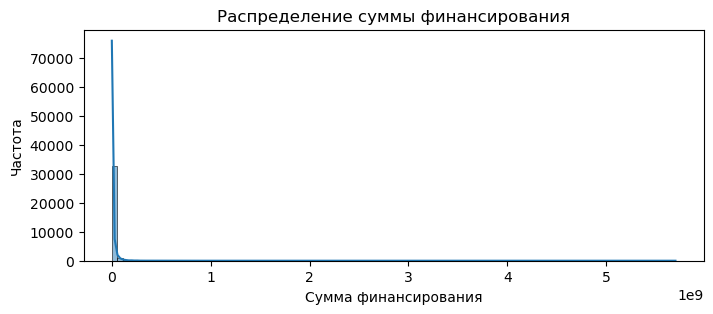

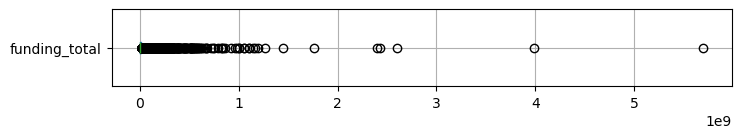

In [46]:
# Построим гистограмму распределения сумм финансирования на одну компанию
plt.figure(figsize=(8,3))
sns.histplot(data=df_company_filter, x='funding_total', bins=100, kde=True)
plt.title('Распределение суммы финансирования')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')
plt.show()

# Строим диаграмму размаха методом boxplot()
boxplot=df_company_filter.boxplot(column='funding_total', vert=False, figsize=(8,1))

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">   Сумма финансирования на компанию варьируется от 0 до 5 700 000 000 руб. Наиболее типичный размер финансирования (медиана) 1 319 970 руб.
Среднее значение, равное 12 135 866 руб. Значительно отличается от медианы, что говорит о ассиметрии в данных и ненормальном распределении, это подтверждает и гистограмма распределения с диаграммой размаха, данные сильно смещены влево. 95% всех данных приходитсяна сумму финансирования на компанию до 50 000 000 руб., 99% на сумму до 150 000 000 руб. Получается, что лишь 1 % данных находится в промежутке от 150 000 000 руб. до 5 700 000 000 руб., наличие выбросов очевидно, но мы их оставляем для дальнейшего анализа. </div>


### 3.3. Куплены забесплатно?

- Необходимо исследуйть компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования, а также рассчитайть аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total`

In [47]:
# Создадим датафрейм df_company_acquisition_zero с компании с финансированием, которые были проданы за ноль или за один доллар
df_company_acquisition_company = df_company_filter.merge(df_acquisition, how='left', left_on='company_id', right_on='acquired_company_id')
df_company_acquisition_zero = df_company_acquisition_company [((df_company_acquisition_company['price_amount']==0)|
                                                           (df_company_acquisition_company['price_amount']==1))&
                                                          ((df_company_acquisition_company['funding_total']!=0))]
df_company_acquisition_zero.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funded_year,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
20,10054.0,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.0,7.0,121500000.0,3.0,2008.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
51,101312.0,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,3.0,4000000.0,2.0,2011.0,9653.0,11391.0,101312.0,NaN,0.0,2013-09-18
54,101340.0,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.0,1.0,250000.0,1.0,2011.0,7272.0,1972.0,101340.0,NaN,0.0,2012-06-18
55,10137.0,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.0,3.0,1310000.0,2.0,2008.0,8254.0,757.0,10137.0,cash_and_stock,0.0,2012-11-05
56,10139.0,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.0,2.0,44925000.0,1.0,2006.0,9326.0,44008.0,10139.0,NaN,0.0,2013-04-01


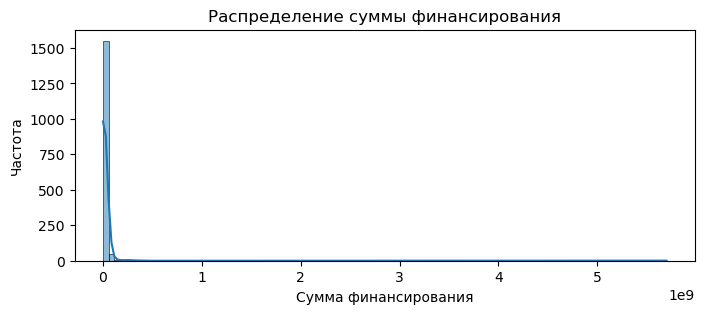

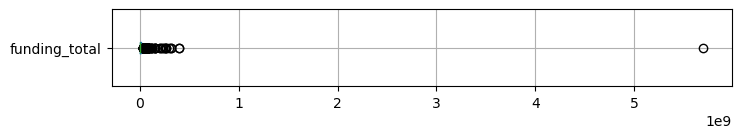

In [48]:
# Построим гистограмму распределения сумм финансирования на одну компанию
plt.figure(figsize=(8,3))
sns.histplot(data=df_company_acquisition_zero, x='funding_total', bins=100, kde=True)
plt.title('Распределение суммы финансирования')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')
plt.show()

# Строим диаграмму размаха методом boxplot()
boxplot=df_company_acquisition_zero.boxplot(column='funding_total', vert=False, figsize=(8,1))

In [49]:
# Находим 90-й процентиль
outliers=df_company_acquisition_zero['funding_total'].quantile(0.9).round(2)

#Находим межквартильный размах IQR
# Вычисляем квартили Q1 и Q3
Q1 = df_company_acquisition_zero['funding_total'].quantile(0.25)
Q3 = df_company_acquisition_zero['funding_total'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний порог для выбросов
upper_bound = Q3 + 1.5 * IQR
# Определяем нижний порог для выбросов
lower_bound=Q1-1.5*IQR

print(f'Нижний порог выбросов: {round(lower_bound,2)}')
print(f'Верхний порог выбросов: {round(upper_bound,2)}')
print(f'90-й процентиль: {outliers}')

Нижний порог выбросов: -18250000.0
Верхний порог выбросов: 35750000.0
90-й процентиль: 33015810.0


In [50]:
# отфильтруем данные по верхнему поргу выбросов
df_company_acquisition_zero=df_company_acquisition_zero[df_company_acquisition_zero['funding_total']<upper_bound]

In [51]:
df_company_acquisition_zero['funding_total'].describe().astype('int64')

count        1471
mean      8313793
std       8559885
min          3750
25%       1755000
50%       5020000
75%      12000000
max      35150000
Name: funding_total, dtype: int64

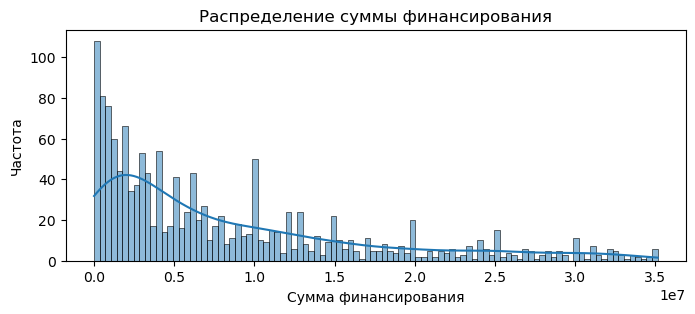

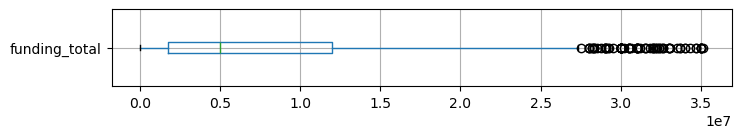

In [52]:
# Построим гистограмму распределения сумм финансирования на одну компанию
plt.figure(figsize=(8,3))
sns.histplot(data=df_company_acquisition_zero, x='funding_total', bins=100, kde=True)
plt.title('Распределение суммы финансирования')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')
plt.show()

# Строим диаграмму размаха методом boxplot()
boxplot=df_company_acquisition_zero.boxplot(column='funding_total', vert=False, figsize=(8,1))

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">   Создан датафрейм df_company_acquisition_zero с компаниями, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования. Данные в этом датафрейме также ассиметричны, сильно смещены влево. Для удаления выбросов была найдена верхняя граница, примерно равная 90-ому процетелю, 35 750 000. Нижняя аналитическая граница ушла в минус, наши данные её не перехоили. После удаления выбросов данные остались ассиметричными, смещенными влево с выбросами, на которые указывет диаграмма размаха, но стали выглядить лучше, чем до удаления.</div>


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов необходимо выделить категории стартапов, характеризующиеся типично высокими ценами и наибольшим разбросом цен за стартап.

In [53]:
# Посмотрим значения описательной статистики цены продажи для каждой категории
company_price_group=df_company_acquisition_company.groupby('category_code')['price_amount'].agg(['mean', 'median', 'min','max'])
company_price_group[['mean', 'max']] = company_price_group[['mean', 'max']].fillna(0).astype('int64')

In [54]:
# Отсортируем по медиане
company_price_group.sort_values(by='median', ascending=False)

,mean,median,min,max
category_code,,,,
photo_video,132996666,36500000.0,0.0,1010470000
biotech,246935000,30000000.0,0.0,6200000000
real_estate,21500000,21500000.0,3000000.0,40000000
manufacturing,39666666,7500000.0,0.0,151000000
advertising,66122047,0.0,0.0,1800000000
cleantech,59524576,0.0,0.0,930000000
automotive,14333333,0.0,0.0,43000000
analytics,15083333,0.0,0.0,263000000
consulting,32444444,0.0,0.0,295000000


In [55]:
#Отсортируем по размаху
company_price_group['range']=(company_price_group['max']-company_price_group['min']).fillna(0).astype('int64')
company_price_group.sort_values(by='range', ascending=False)

,mean,median,min,max,range
category_code,,,,,
enterprise,13576842371,0.0,0.0,2600000000000,2600000000000
public_relations,1372322033,0.0,0.0,39000000000,39000000000
mobile,108914741,0.0,0.0,12500000000,12500000000
software,97091356,0.0,0.0,8500000000,8500000000
semiconductor,333265131,0.0,0.0,6500000000,6500000000
biotech,246935000,30000000.0,0.0,6200000000,6200000000
games_video,99749379,0.0,0.0,5040000000,5040000000
web,78418020,0.0,0.0,4300000000,4300000000
hardware,136578787,0.0,0.0,3100000000,3100000000


<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  К стартапам с типично высокими ценами можно отнести следующие категории: photo_video, biotech, real_estate, manufacturing. Были выбраны именно эти 5 компаний, потому что их медиана находится в диапазоне от 7 500 000 до 36 500 000, у остальных категорий медина равна 0. 
Для определения категорий с наибольшим разбросом цен за стартап был расчитан размах. В качестве выделения категорий выберем размах более 10 000 000 000, к этим категориям можем отнести 3: enterprise(enterprise), public_relations(1372322033) и mobile(12 500 000 000).


### 3.5. Сколько раундов продержится стартап перед покупкой

Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
Необходимо также аостройть график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [56]:
# Рассчитаем медиану и средню по раундам в разрезе статуса
group_status=df_company_filter.groupby('status')['funding_rounds'].agg(['median','mean']).round(2).reset_index()
group_status

,status,median,mean
0,acquired,1.0,1.84
1,closed,1.0,1.38
2,ipo,1.0,1.93
3,operating,1.0,1.52


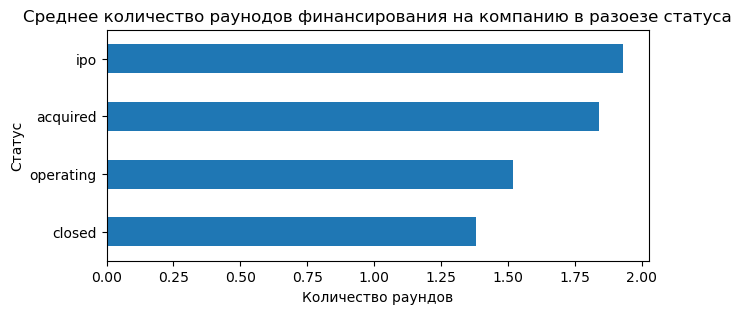

In [57]:
#Построим линейную гистаграмму 'Среднее количество раунодов финансирования на компанию в разоезе статуса'
group_status.sort_values(by='mean').plot(kind='barh', x='status', y='mean', legend=False, rot=0, figsize=(7,3))
plt.title('Среднее количество раунодов финансирования на компанию в разоезе статуса')
plt.xlabel('Количество раундов')
plt.ylabel('Статус')
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;"> Типичное значение количества раундов для каждого возможного статуса стартапа одинаково и равно одному, это нам показала медиана. Среднее количество раундов варьируется от 1.38 для статуса 'closed' до 1.93 для статуса 'ipo'.


## Шаг 4. Итоговый вывод и рекомендации

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  
    В рамках исследования подготовили датасет и проверили данные на адекватность, ответили на вопросы о предобработке и о значении данных для бизнеса.<br>

Были предобработаны данные: изменены названия столбцов, типы данных, проанализированы пропуски.<br>

Исследование финансирования в рамках одного раунда показало, что типичный размер собранных в рамках одного раунда средств был максимален в 2005 году,  после пика в 2005 году размер средств, начал снижаться до 2012 года, и только в 2013 году тренд начал меняться в большую сторону.<br>

Изучена связь между размером компании и полнотой сведений об образовании ее сотрудников, которая показала, что чем меньше компания по количеству сотрудников, тем больше пропусков в информации об образовании сотрудников в этих компаниях.<br>

Не все столбцы в разных датафреймах с одинаковым названием подходят для объединения, т.к. они могут содержать совершенно другой смысл или даже при условии, что смысл одинаковый, это может привести к огромному числу строк, при котором ядро не справится с объединением, в работе подробно рассмотрели на примере столбца network_username, коьорый встречается сразу в трех таблицах.<br>

Установили причину большого количества пропусков в таблице df_company_and_rounds и разбили ее на 2 отдельных таблицы с компаниями и с раундами.<br>

Подготовили датафрейм с компаниями,  которые меняли или готовы менять владельца.<br>

Изучили выбросы обычного для рассматриваемого периода размера средств, который предоставлялся компаниям. <br>

Исследовали компании, которые были проданы за ноль или за один доллар, но с  ненулевым общим объёмом финансирования. <br>
Рассмотрели и удалили выбросы.<br>

Изучили и выделили несколько категорий стартапов с типично высокими ценами покупки стартапов (photo_video, biotech, real_estate, manufacturing ) и значительным разбросом цен (enterprise, public_relations,  mobile).<br>

Исследовали типичное и среднее значение раундов для компании в разрезе статуса. Типичное значение одинаково и равно одному, среднее количество раундов варьируется от 1.38 для статуса 'closed' до 1.93 для статуса 'ipo'.
</div>